# Exercise 7
## NaiveBayes and SVM Classifiers
Perform classification using NaiveBayes and SVM on Iris dataset. Display the confusion matrix for the various classifiers. Analyze the performance of SVM for different kernel functions. Represent the results of the classification in terms of precision and recall using graphs.

Import Iris dataset

In [1]:
import pandas as pd
df = pd.read_csv('Iris.csv')
df = df.drop('Id',axis=1)

Converting categorical data into numerical data.

In [2]:
print(df.Species.dtype)

object


In [3]:
from sklearn import preprocessing

if df.Species.dtype == 'object':
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(df.Species.values))
    df.Species = lbl.transform(list(df.Species.values))
    
print(df.Species.dtype)

int64


Splitting the dataset into training date and testing data

In [4]:
from sklearn.model_selection import train_test_split

Y = df.Species.values
X = df.drop(['Species'],axis=1).values

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size= 0.20, random_state=29)

Fit the data into NaiveBayes classifier

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb = GaussianNB()
NaiveBayesModel = gnb.fit(x_train, y_train)
y_pred = NaiveBayesModel.predict(x_test)
accuracy_score(y_test, y_pred)

0.9

Draw the confusion matrix

In [6]:
from sklearn.metrics import confusion_matrix
ConfusionMatrix = confusion_matrix(y_test,y_pred)
print(ConfusionMatrix)

[[ 4  0  0]
 [ 0  9  1]
 [ 0  2 14]]


In [7]:
import seaborn as sn

sn.set(font_scale=1.4)
sn.heatmap(pd.DataFrame(ConfusionMatrix), annot=True,annot_kws={"size": 16})

Fitting the data into SVM classifier

In [8]:
from sklearn import svm

from sklearn.metrics import average_precision_score

x_train, x_test, y_train, y_test = train_test_split(X[Y<2],Y[Y<2], test_size= 0.95)

classifier = svm.LinearSVC(random_state=27)
classifier.fit(x_train, y_train)
y_score = classifier.decision_function(x_test)

average_precision = average_precision_score(y_test, y_score)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 1.00


Since the precision-recall score is 100%, we will try adding noise data and build the SVM model.

In [9]:
import numpy as np
# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

x_train, x_test, y_train, y_test = train_test_split(X[Y<2],Y[Y<2], test_size= 0.20)

#### Using Linear kernel

Average precision-recall score: 0.7606593406593405


Text(0,0.5,'Precision')

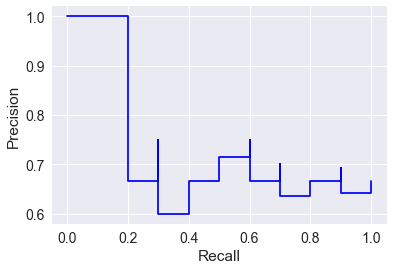

In [10]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

classifier = svm.SVC(kernel='linear', random_state=29)
classifier.fit(x_train, y_train)
y_score = classifier.decision_function(x_test)

print('Average precision-recall score:',average_precision_score(y_test, y_score))
precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')

#### Using Polynomial Kernel

Average precision-recall score: 0.866056166056166


Text(0,0.5,'Precision')

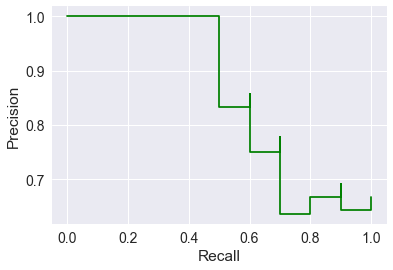

In [11]:
classifier = svm.SVC(kernel='poly', random_state=29)
classifier.fit(x_train, y_train)
y_score = classifier.decision_function(x_test)

print('Average precision-recall score:',average_precision_score(y_test, y_score))
precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='g')
plt.xlabel('Recall')
plt.ylabel('Precision')

#### Using RBF (Radial Basis Function) Kernel

Average precision-recall score: 0.7423260073260073


Text(0,0.5,'Precision')

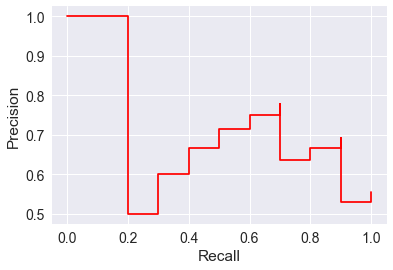

In [12]:
classifier = svm.SVC(kernel='rbf', random_state=29)
classifier.fit(x_train, y_train)
y_score = classifier.decision_function(x_test)

print('Average precision-recall score:',average_precision_score(y_test, y_score))
precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')